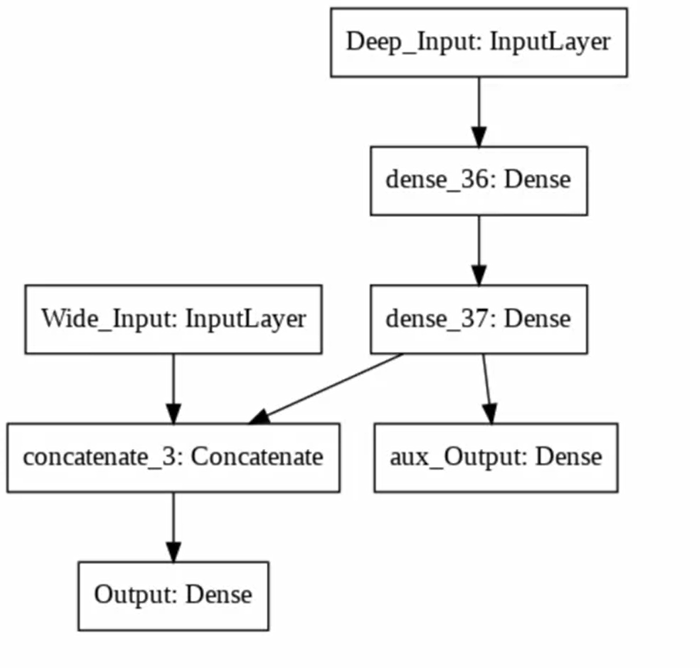

In [1]:
import tensorflow as tf

# Implementation with Fuctional API

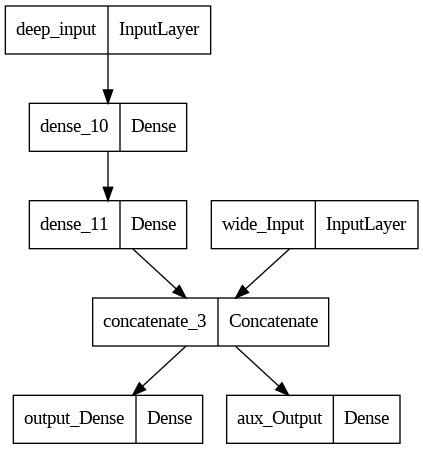

In [6]:
wide_input_layer = tf.keras.layers.Input(name = 'wide_Input', shape = [1])
deep_input_layer = tf.keras.layers.Input(name = 'deep_input', shape = [1])

dense_1 = tf.keras.layers.Dense(30, activation = 'relu')(deep_input_layer)
dense_2 = tf.keras.layers.Dense(30, activation = 'relu')(dense_1)
concat_1 = tf.keras.layers.concatenate([wide_input_layer, dense_2])

aux_output = tf.keras.layers.Dense(10, name = 'aux_Output', activation = 'softmax')(concat_1)
concat_output = tf.keras.layers.Dense(10, name = 'output_Dense', activation = 'softmax')(concat_1)

functional_model = tf.keras.models.Model(inputs = [wide_input_layer, deep_input_layer], outputs = [concat_output, aux_output])
tf.keras.utils.plot_model(functional_model, to_file='model.png')

# Implementation with Class

In [8]:
class WideAndDeepModel(tf.keras.Model):
    def __init__(self, units=30, activation='relu', **kwargs):
        '''initializes the instance attributes'''
        super().__init__(**kwargs)
        self.hidden1 = tf.keras.layers.Dense(units, activation=activation)
        self.hidden2 = tf.keras.layers.Dense(units, activation=activation)
        self.main_output = tf.keras.layers.Dense(1)
        self.aux_output = tf.keras.layers.Dense(1)

    def call(self, inputs):
        '''defines the network architecture'''
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = tf.keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        
        return main_output, aux_output

In [9]:
model = WideAndDeepModel()